In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge

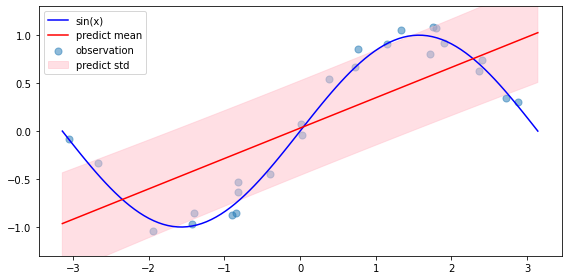

In [67]:

def func(x): return np.sin(x)

# #############################################################################
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(-np.pi, np.pi, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(-np.pi, np.pi, 100)


# #############################################################################
# Fit by Linear Model
n_order = 1
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

reg.fit(X_train, y_train)
ymean, ystd = reg.predict(X_test, return_std=True)

ax.plot(x_test, func(x_test), color="blue", label="sin(x)")
ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
ax.plot(x_test, ymean, color="red", label="predict mean")
ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                color="pink", alpha=0.5, label="predict std")
ax.set_ylim(-1.3, 1.3)
ax.legend()

plt.tight_layout()
plt.show()

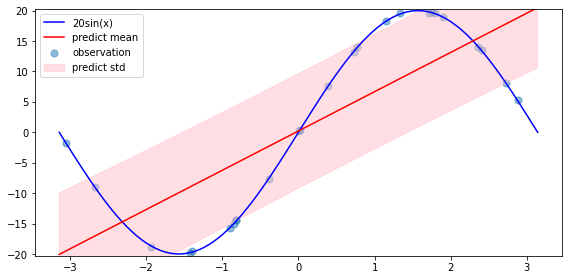

In [66]:

def func(x): return 20*np.sin(x)

# #############################################################################
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(-np.pi, np.pi, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(-np.pi, np.pi, 100)


# #############################################################################
# Fit by Linear Model
n_order = 1
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

reg.fit(X_train, y_train)
ymean, ystd = reg.predict(X_test, return_std=True)

ax.plot(x_test, func(x_test), color="blue", label="20sin(x)")
ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
ax.plot(x_test, ymean, color="red", label="predict mean")
ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                color="pink", alpha=0.5, label="predict std")
ax.set_ylim(-20.3, 20.3)
ax.legend()

plt.tight_layout()
plt.show()